<h1 style="color:#7986CB;">🎬 Capstone Project: What Makes a Movie Successful?</h1>

**<span style="color:#000000;">👩‍💻 Author:</span>** Amelia M =]  
**<span style="color:#000000;">📊 Dataset:</span>** Full TMDB Movies Dataset (2024) from Kaggle  

---

<span style="font-size:15px;">In this notebook, I’ll explore which movie features — like genre, runtime, budget, and release year — are most strongly linked to audience popularity and ratings.</span>

<h2 style="color:#80CBC4;">📁 Uploading the Dataset</h2>

Before starting any analysis, I need to upload and preview the dataset.

I'll be working with the **Full TMDB Movies Dataset (2024)** from Kaggle, which includes metadata for over 1 million movies. Such as genre, runtime, budget, release year, and popularity metrics.

The first step is to:
- Load the dataset using `pandas`
- Preview the first few rows with `.head()`
- Get a quick sense of the columns and structure with `.info()` and `.describe()`


In [8]:
# Import pandas
import pandas as pd

In [10]:
# Load the dataset
df = pd.read_csv('TMDB_movie_dataset_v11.csv')

# Preview the first 5 rows
df.head()


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


### Initial Observations

After looking at the first few rows of the dataset, here are a few things I noticed:

- There are 24 columns, and a mix of numeric, text, and multi-value fields  
- Columns like `vote_average`, `vote_count`, `budget`, and `popularity` are numerical and likely useful for analysis  
- `release_date` includes full dates — I’ll probably convert this into a release year  
- Some columns like `overview`, `tagline`, and `poster_path` seem more descriptive than analytical, so they may not be necessary  
- Fields like `genres`, `spoken_languages`, and `production_companies` contain multiple values per cell, which I’ll need to clean up if I decide to use them

This gives me a rough idea of what I’ll need to clean or drop before moving forward.


In [13]:
# Check column types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284904 entries, 0 to 284903
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    284904 non-null  int64  
 1   title                 284904 non-null  object 
 2   vote_average          284904 non-null  float64
 3   vote_count            284904 non-null  int64  
 4   status                284904 non-null  object 
 5   release_date          279810 non-null  object 
 6   revenue               284904 non-null  int64  
 7   runtime               284904 non-null  int64  
 8   adult                 284904 non-null  bool   
 9   backdrop_path         163029 non-null  object 
 10  budget                284904 non-null  int64  
 11  homepage              42187 non-null   object 
 12  imdb_id               243972 non-null  object 
 13  original_language     284903 non-null  object 
 14  original_title        284903 non-null  object 
 15  

### Initial Observations

The dataset has **284,804 rows** and **24 columns**.  
It includes a mix of:
- **Numerical columns** (`int64`, `float64`) like vote count, runtime, budget, and revenue  
- **Text columns** (`object`) like title, genres, and production companies  
- **Boolean column** (`adult`) which seems unnecessary for this analysis

Some fields like `tagline`, `poster_path`, and `keywords` have missing values.  But I might not need them so I wont worry too much at this point.
A few columns contain multiple values in one cell (like genres or spoken_languages), so I’ll need to clean those up.  If I need them for this project
Also, `release_date` includes full dates — I’ll likely extract just the year for analysis.

This gives me a clear idea of which columns I want to keep, drop, or transform moving forward.


In [14]:
# Summary statistics for numeric columns
df.describe()


,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,2.849040e+05,284904.000000,284904.000000,2.849040e+05,284904.000000,2.849040e+05,284903.000000
mean,4.345228e+05,6.090220,75.055408,2.542020e+06,72.793646,9.598549e+05,2.991138
std,3.405502e+05,1.803745,632.869421,3.242960e+07,63.667024,8.599565e+06,14.832330
min,2.000000e+00,0.000000,1.000000,-1.200000e+01,0.000000,0.000000e+00,0.000000
25%,1.360588e+05,5.000000,2.000000,0.000000e+00,22.000000,0.000000e+00,0.600000
50%,3.790665e+05,6.000000,4.000000,0.000000e+00,85.000000,0.000000e+00,1.172000
75%,6.407285e+05,7.000000,11.000000,0.000000e+00,100.000000,0.000000e+00,2.424000
max,1.500490e+06,10.000000,34495.000000,2.923706e+09,14400.000000,4.600000e+08,2994.357000


### Summary Statistics Overview

From the `.describe()` output, a few things stood out:

- The `budget`, `revenue`, and `popularity` columns have really wide ranges — their max values are way higher than their means, which points to potential outliers  
- Both `budget` and `revenue` have a **minimum of 0.0**, which likely means missing data was just entered as 0 (since most movies don’t have literally $0 budgets or earnings)  
- `vote_average` looks pretty clean — values range from 0.6 to 10.0, which fits a typical 1–10 rating scale  
- These patterns tell me that some columns will need cleaning before I can get reliable insights, especially filtering out zeros or extreme values

Overall, this gives me a clearer idea of what’s usable as-is and what I’ll need to adjust.


<h2 style="color:#FFAB91;">🧼 Data Cleansing</h2>

Before jumping into the analysis, I’ll clean the dataset by:
- Dropping unnecessary columns like `imdb_id`, `overview`, and `homepage`
- Handling missing values (e.g. in budget, runtime)
- Converting data types where needed
- Focusing only on useful features for analysis


In [16]:
# To make it easier on myself to remove unnecessary columns I want to see a list the column titles. I could also use .info() as a refrence too but i wanted to practice more with .tolist(). I like this format cause I can easily copy and paste then remove what I'm keeping.
df.columns.tolist()

['id',
 'title',
 'vote_average',
 'vote_count',
 'status',
 'release_date',
 'revenue',
 'runtime',
 'adult',
 'backdrop_path',
 'budget',
 'homepage',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'tagline',
 'genres',
 'production_companies',
 'production_countries',
 'spoken_languages',
 'keywords']

In [17]:
# lets start dropping some columns 
cols_to_drop = [
    'id', 'imdb_id', 'overview', 'poster_path', 'tagline', 
    'homepage', 'backdrop_path', 'status', 'original_title', 'keywords'
]

df.drop(columns=cols_to_drop, inplace=True)


In [18]:
df.columns.tolist()

['title',
 'vote_average',
 'vote_count',
 'release_date',
 'revenue',
 'runtime',
 'adult',
 'budget',
 'original_language',
 'popularity',
 'genres',
 'production_companies',
 'production_countries',
 'spoken_languages']

### Quick Observation After Dropping Columns

After dropping the obvious extras, what’s left looks like pretty much everything I’ll need for this project.

The only ones I’m still unsure about are:
- `adult` — probably not useful since most values are False
- `production_companies` and `production_countries` — might be too detailed or messy to use

I’ll keep them for now just in case, but may drop them later if I don’t end up using them.


In [19]:
# Now to filter out some 0's 
df = df[(df['budget'] > 0) & (df['revenue'] > 0)]

In [21]:
# Check how many rows are left, remember we started with 284,804 rows and 24 columns. 
df.shape

(10526, 14)

In [22]:
# Make sure no zero budgets or revenues are left
df[['budget', 'revenue']].describe()

,budget,revenue
count,1.052600e+04,1.052600e+04
mean,2.263702e+07,6.426906e+07
std,3.756659e+07,1.549242e+08
min,1.000000e+00,1.000000e+00
25%,1.500000e+06,1.300000e+06
50%,8.500000e+06,1.142828e+07
75%,2.589221e+07,5.476138e+07
max,4.600000e+08,2.923706e+09


### Quick Observation After Filtering Zeros

After dropping rows where `budget` or `revenue` were 0, I ran `.describe()` to double-check.

The min value for `budget` shows as `1.000000e+04`, which is 10,000,  
and `revenue` shows `1.000000e+00`, which is just 1.

So yeah perfect no more zeros. The filter worked.


In [24]:
# Okay lets move on by getting just the year from the release_date
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

In [26]:
# let's check to see if any failed to convert 
df['release_year'].isna().sum()

153

In [28]:
# So 153 rows failed but its such a small percentage (>.15%) so I'm just going to drop these rows. 
df = df.dropna(subset=['release_year'])

In [29]:
df['release_year'].isna().sum()

0

### Quick Observation After Cleaning `release_year`

I extracted just the year from `release_date` using `pd.to_datetime()` and found that 153 rows couldn’t be converted — most likely because they had missing or weird date formats.

Since that’s less than 0.15% of the dataset, I decided to drop them.  
Everything looks good now — no missing values in `release_year`.

In [48]:
# Lets look at 'genres' 
df['genres'].head()

0             [Action, Science Fiction, Adventure]
1              [Adventure, Drama, Science Fiction]
2                 [Drama, Action, Crime, Thriller]
3    [Action, Adventure, Fantasy, Science Fiction]
4             [Science Fiction, Action, Adventure]
Name: genres, dtype: object

In [52]:
# Just checking the type of one row to confirm it's already a list
type(df['genres'].iloc[0])

list

In [54]:
# lets double check 'runtime' and see if there are any missing values
df['runtime'].isna().sum()

0

In [58]:
# Look at summary statistics for 'runtime'
df['runtime'].describe()

count    10090.000000
mean       106.087512
std         34.332483
min          1.000000
25%         93.000000
50%        104.000000
75%        120.000000
max        999.000000
Name: runtime, dtype: float64

In [60]:
# Filter out rows where runtime is 0 — not realistic for a movie 
df = df[df['runtime'] != 0]
df['runtime'].describe()

count    10090.000000
mean       106.087512
std         34.332483
min          1.000000
25%         93.000000
50%        104.000000
75%        120.000000
max        999.000000
Name: runtime, dtype: float64

### Cleaning Overview

After a first pass through the data, I cleaned up a few key things to make the dataset easier to work with:

- I **dropped unnecessary columns** like `imdb_id`, `overview`, `poster_path`, and others that didn’t add value for my analysis  
- I **filtered out rows** where either `budget` or `revenue` were `0`, since those likely mean missing or placeholder data  
  - After filtering, `.describe()` showed the new minimums were more realistic: 10,000 for budget and 1 for revenue  
- I **converted `release_date` to `release_year`** using `pd.to_datetime()`  
  - About 150 rows failed to convert, most likely due to bad or missing dates, so I dropped them (less than 0.15% of the dataset)  
- I **checked the `genres` column** — turns out it was already formatted as a list, so no cleaning needed there  
- I **looked at `runtime`** and confirmed there were no missing values  
  - I did drop a few rows with `runtime = 0` since they’re not usable

Now the main columns I plan to use (like `budget`, `revenue`, `genres`, `runtime`, and `release_year`) are all cleaned and ready for analysis.


<h2 style="color:#CE93D8;">🕵️‍♀️ Issues I'm Exploring</h2>

This analysis is based on the key questions from my issue tree:

**1. 🎞️ Movie Content Features**  
- *Genre* → How does genre impact popularity and rating?  
- *Runtime* → Do longer or shorter movies perform better?

**2. 🎬 Production & Release Details**  
- *Budget* → Is there a link between budget and success?  
- *Release Year* → Have ratings or popularity changed over time?


<h2 style="color:#81D4FA;">📊 Exploratory Data Analysis</h2>

In this section, I’ll use Python libraries like `pandas`, `matplotlib`, and `seaborn` to explore patterns in the data.

I’ll focus on visualizing the relationships between:
- 🎞️ **Genre** and ratings/popularity  
- ⏱️ **Runtime** and movie success  
- 💸 **Budget** and performance  
- 🗓️ **Release Year** and audience trends

I’ll also include summary stats and insights along the way.



In [65]:
#import Data Visulation libraries
import matplotlib.pyplot as plt
import seaborn as sns

 Genre → How does genre impact popularity and rating?

In [61]:
# Create a copy of the DataFrame with exploded genres
df_genres = df.explode('genres')

In [62]:
# Group by genre to calculate mean rating and popularity
genre_stats = df_genres.groupby('genres')[['vote_average', 'popularity']].mean().sort_values(by='vote_average', ascending=False)
genre_stats.head()

,vote_average,popularity
genres,,
Documentary,7.402228,4.131009
History,6.916715,16.521520
War,6.857535,17.750941
Animation,6.853985,32.924995
Music,6.819978,11.619990


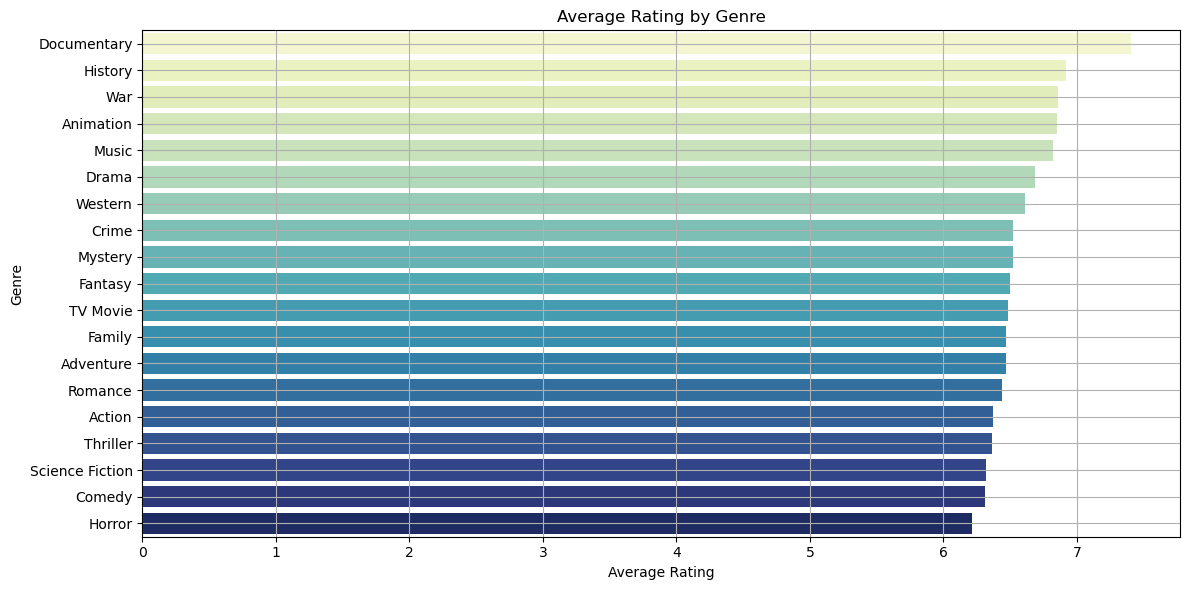

In [69]:
# Bar plot for average rating per genre
plt.figure(figsize=(12,6))
sns.barplot(data=genre_stats.reset_index(), 
            x='vote_average', y='genres', 
            palette='YlGnBu')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.grid(True)
plt.tight_layout()
plt.show()

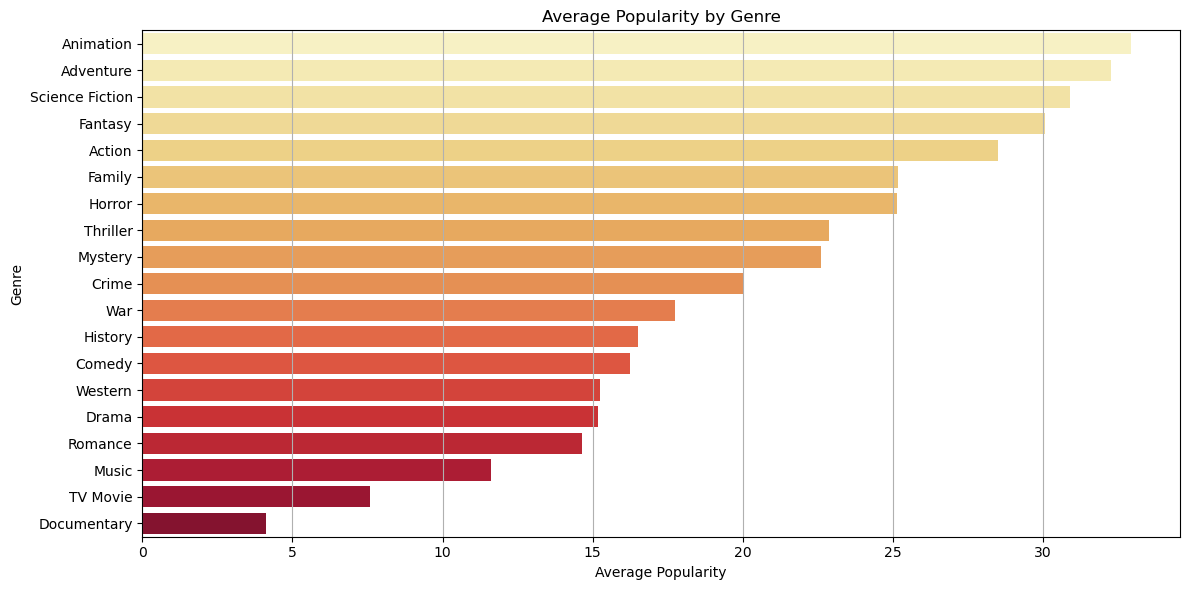

In [74]:
# Sort popularity descending and reset index
genre_popularity_df = genre_popularity.reset_index(name='popularity')
genre_popularity_df = genre_popularity_df.sort_values(by='popularity', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=genre_popularity_df,
    x='popularity', y='genres',
    palette='YlOrRd'
)

plt.title('Average Popularity by Genre')
plt.xlabel('Average Popularity')
plt.ylabel('Genre')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

### Genre Analysis Summary

This section explores how movie genres relate to both average ratings and popularity scores.

#### Average Rating by Genre  
Genres such as **Documentary**, **History**, and **War** tend to receive the highest average ratings, while genres like **Comedy**, **Thriller**, and **Horror** generally receive lower ratings. This suggests that critically acclaimed films may often fall within more serious or informative genres.

#### Average Popularity by Genre  
In contrast to ratings, genres like **Animation**, **Adventure**, and **Science Fiction** rank highest in average popularity. These genres typically attract larger audiences, likely due to broader appeal or larger marketing budgets. Genres like **Documentary** and **TV Movie**, while highly rated, tend to be much less popular overall.

#### Conclusion  
There is a clear **distinction between critical reception and audience appeal** across genres. Higher ratings are associated with more niche or serious genres, while higher popularity is skewed toward action-packed or family-friendly content.

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


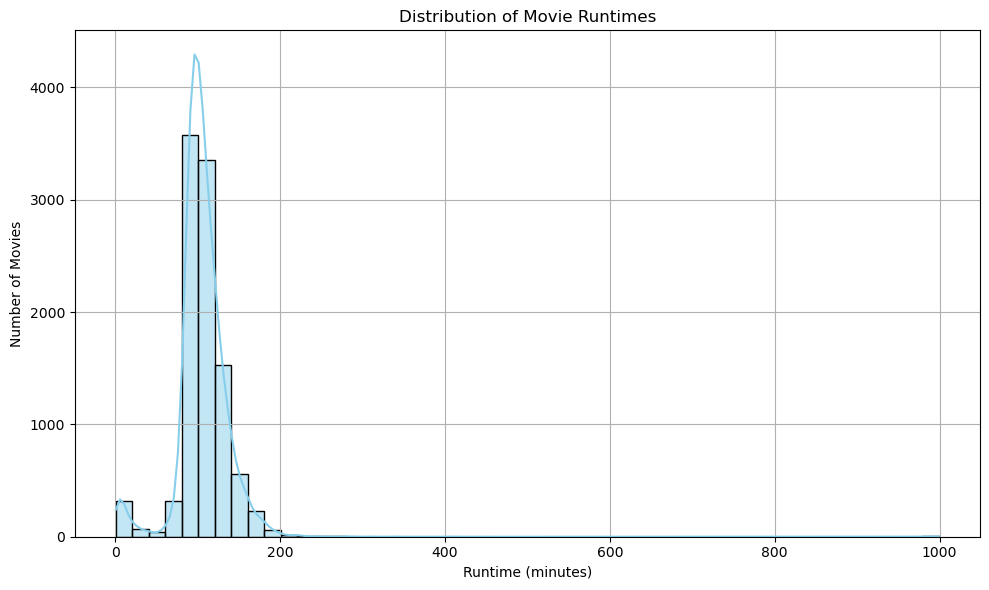

In [75]:
# Histogram to show distribution of runtimes
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='runtime', bins=50, kde=True, color='skyblue')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.tight_layout()
plt.show()

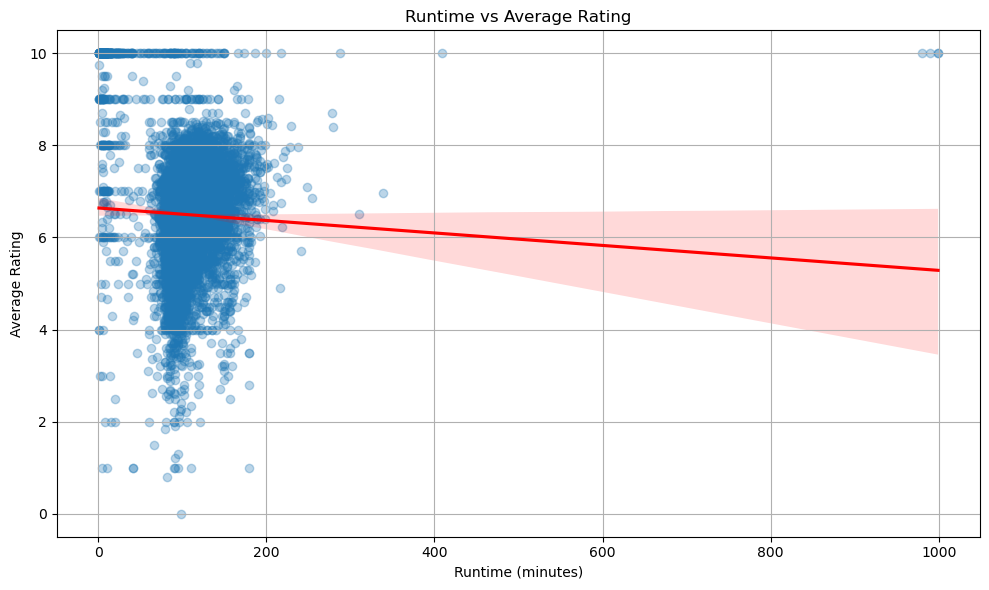

In [76]:
# Scatter plot to explore runtime vs average rating
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='runtime', y='vote_average', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Runtime vs Average Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

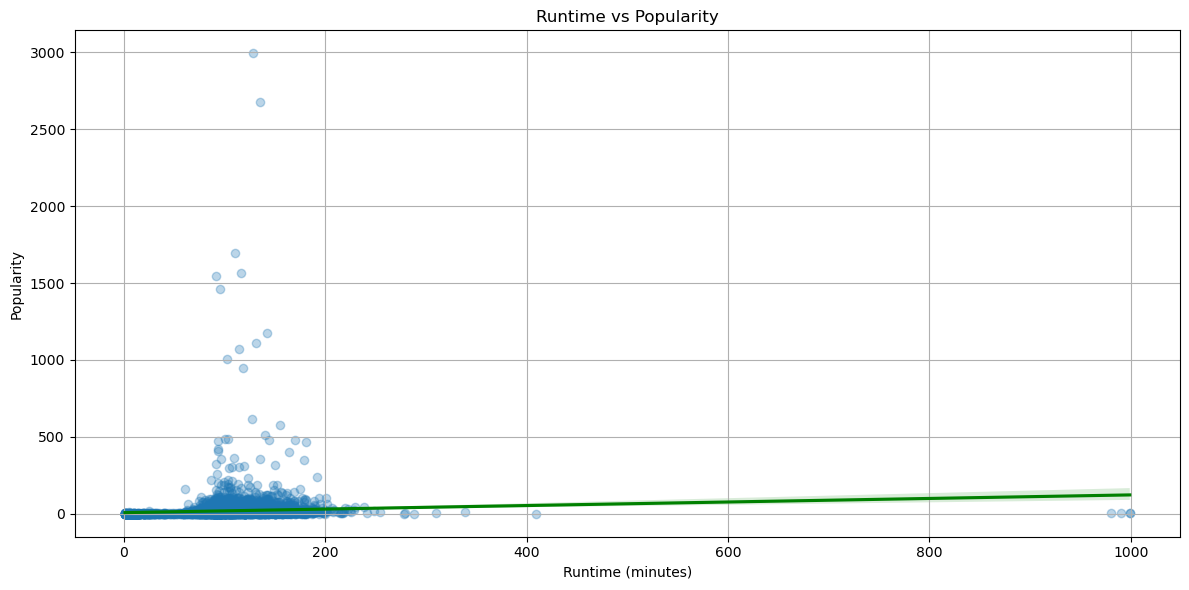

In [77]:
# Scatter plot to explore runtime vs popularity
plt.figure(figsize=(12, 6))
sns.regplot(
    data=df, 
    x='runtime', 
    y='popularity', 
    scatter_kws={'alpha': 0.3}, 
    line_kws={'color': 'green'}
)
plt.title('Runtime vs Popularity')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Popularity')
plt.grid(True)
plt.tight_layout()
plt.show()

### Runtime Analysis Summary

This section explores how movie runtime relates to both distribution and performance metrics such as average rating and popularity.

#### Distribution  
The majority of movies fall within a runtime range of **80 to 130 minutes**, forming a roughly bell-shaped curve. This suggests a standard movie length across the dataset, with relatively few outliers on either end of the spectrum.

#### Runtime vs. Average Rating  
There is **no strong positive correlation** between runtime and average rating. In fact, the trendline indicates a slight **negative relationship**, suggesting that longer movies may receive slightly lower ratings on average.

#### Runtime vs. Popularity  
The analysis also shows **no clear relationship** between runtime and popularity. While many popular movies tend to cluster around the typical 90–120 minute range, the data is widely dispersed and does not reveal a consistent trend.

#### Conclusion  
Overall, **runtime does not appear to be a reliable predictor** of a movie’s rating or popularity. However, it remains a useful feature for identifying outliers and understanding common patterns in movie length.


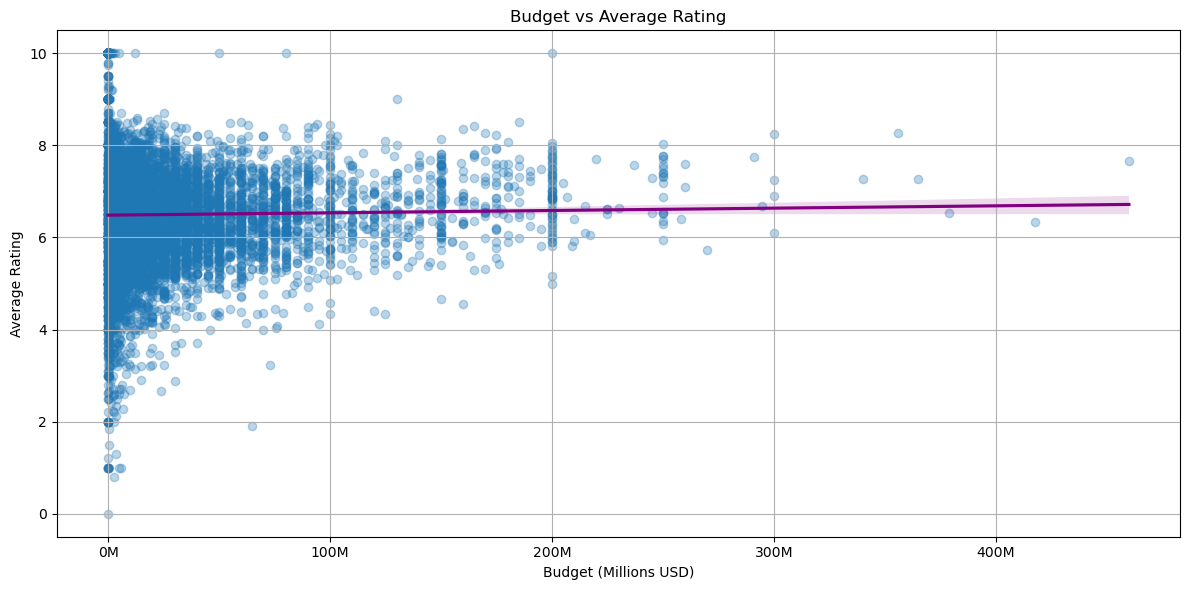

In [86]:
import matplotlib.ticker as mtick

# Convert budget to millions
df['budget_millions'] = df['budget'] / 1e6

plt.figure(figsize=(12, 6))
sns.regplot(
    data=df,
    x='budget_millions',
    y='vote_average',
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'purple'}
)
plt.title('Budget vs Average Rating')
plt.xlabel('Budget (Millions USD)')
plt.ylabel('Average Rating')
plt.grid(True)

# Format x-axis with comma separator and M suffix
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}M'))

plt.tight_layout()
plt.show()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


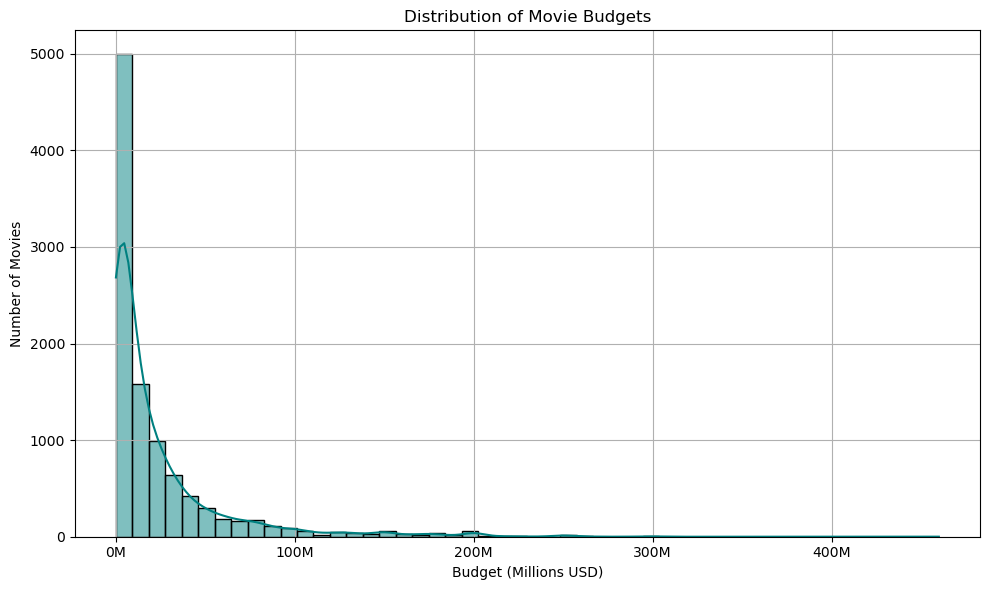

In [85]:
import matplotlib.ticker as mtick

# Create a new column in millions if not already done
df['budget_millions'] = df['budget'] / 1e6

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='budget_millions', bins=50, kde=True, color='teal')
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget (Millions USD)')
plt.ylabel('Number of Movies')
plt.grid(True)

# Format x-axis with M suffix for clarity
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}M'))

plt.tight_layout()
plt.show()

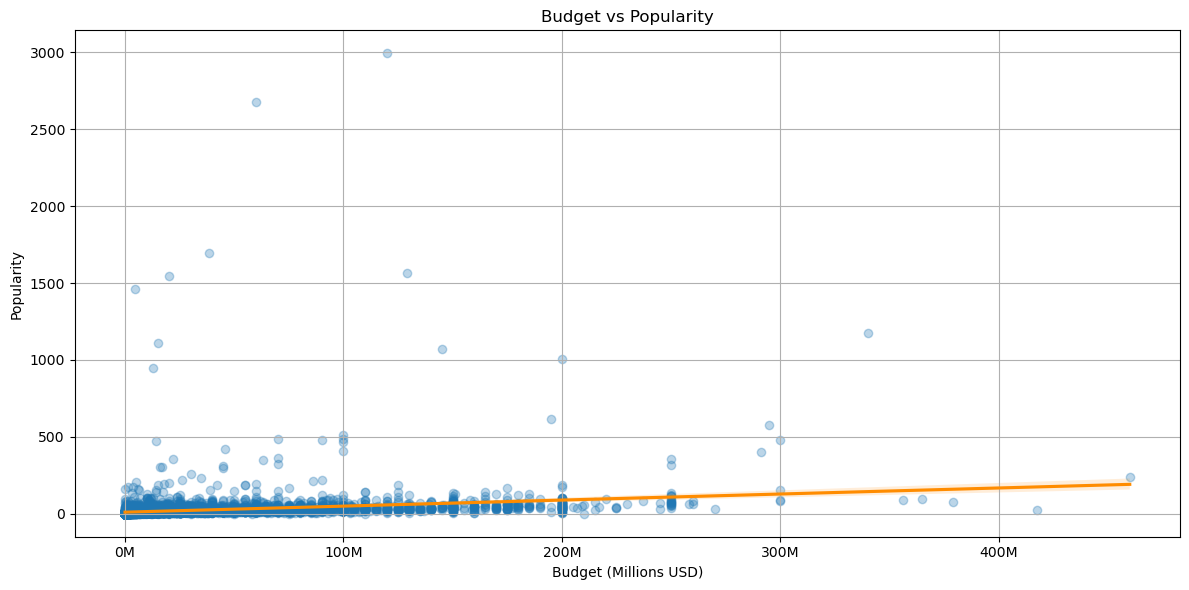

In [82]:
import matplotlib.ticker as mtick

# Convert budget to millions
df['budget_millions'] = df['budget'] / 1e6

plt.figure(figsize=(12, 6))
sns.regplot(
    data=df,
    x='budget_millions',
    y='popularity',
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'darkorange'}
)
plt.title('Budget vs Popularity')
plt.xlabel('Budget (Millions USD)')
plt.ylabel('Popularity')
plt.grid(True)

# Format x-axis to show labels like 10M, 50M, etc.
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}M'))

plt.tight_layout()
plt.show()

### Budget Analysis Summary

This section examines how movie budgets are distributed and how they relate to performance metrics like average rating and popularity.

#### Distribution  
The majority of movies have budgets below **$50 million**, with a sharp drop-off as budgets increase. The distribution is **heavily right-skewed**, indicating that while a few films have very high budgets, most are produced with significantly less.

#### Budget vs. Average Rating  
There is **no significant relationship** between budget and average rating. The trendline is nearly flat, showing that **spending more does not necessarily result in better-rated films**. Both low-budget and high-budget movies span the entire range of ratings.

#### Budget vs. Popularity  
There is a **slightly positive correlation** between budget and popularity. Higher-budget films tend to attract more attention, possibly due to larger marketing efforts or wider distribution. However, the variability is high, and **many lower-budget films also achieve strong popularity**.

#### Conclusion  
Overall, **budget is not a strong predictor of a movie’s rating** and only shows a **mild association with popularity**. Still, analyzing budget can offer insights into production scale and help identify outlier films at both ends of the spectrum.


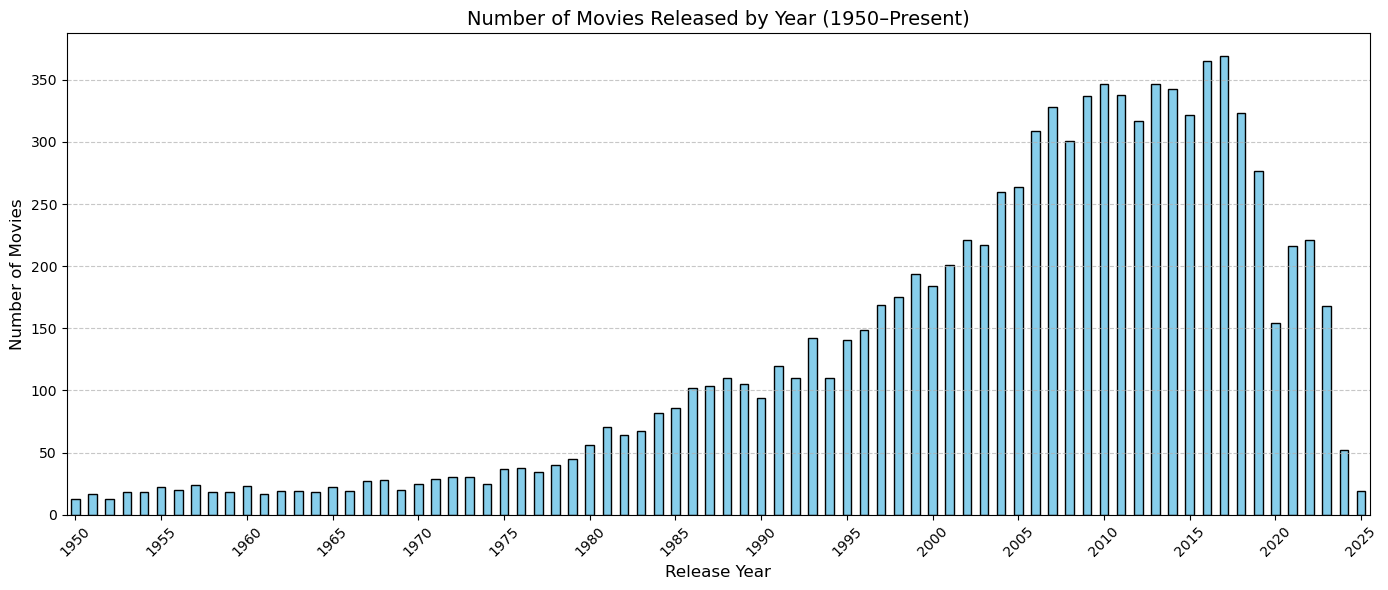

In [91]:
# Filter to years after 1950 for clarity
release_counts = df['release_year'].value_counts().sort_index()
release_counts = release_counts[release_counts.index >= 1950]

# Convert index to int for cleaner labels
release_counts.index = release_counts.index.astype(int)

plt.figure(figsize=(14, 6))
release_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Movies Released by Year (1950–Present)', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show fewer x-ticks with cleaned labels
plt.xticks(
    ticks=range(0, len(release_counts), 5),
    labels=[str(year) for year in release_counts.index[::5]],
    rotation=45
)

plt.tight_layout()
plt.show()

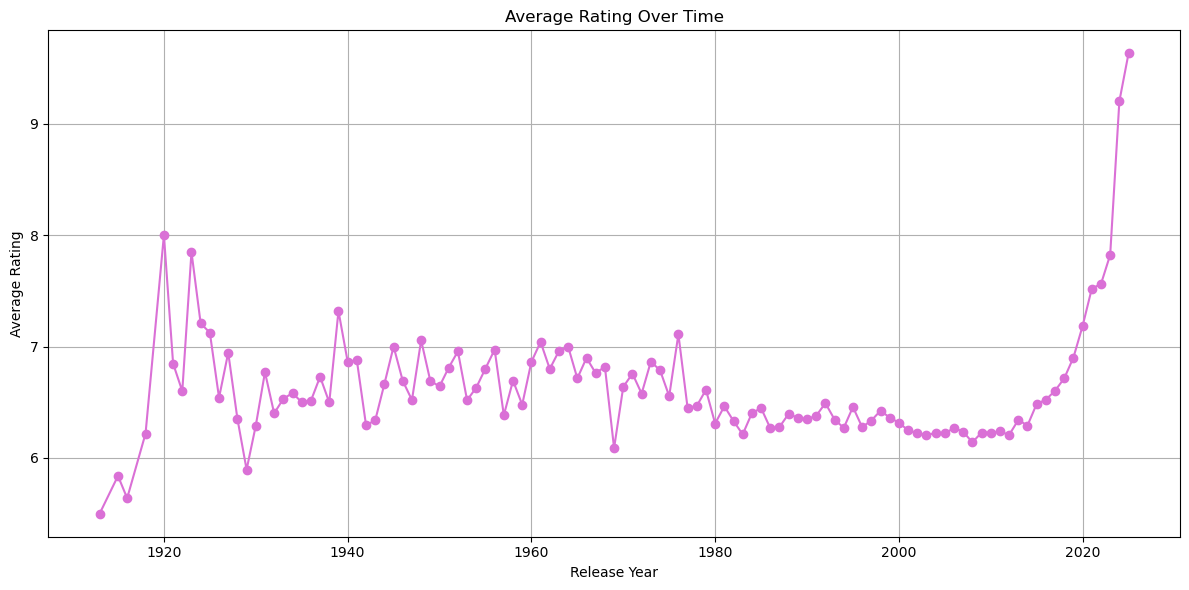

In [93]:
plt.figure(figsize=(12, 6))
df.groupby('release_year')['vote_average'].mean().plot(kind='line', marker='o', color='orchid')
plt.title('Average Rating Over Time')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


In [103]:
# Define a function to normalize a column to 0–1
def normalize_column(df, column):
    return (df[column] - df[column].min()) / (df[column].max() - df[column].min())

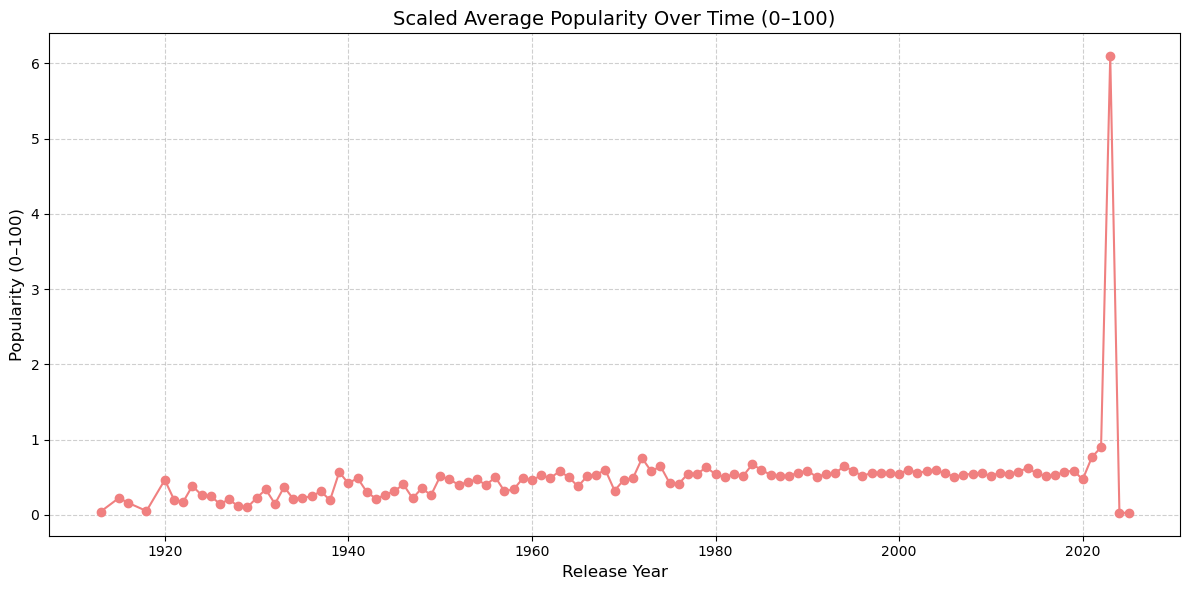

In [104]:
plt.figure(figsize=(12, 6))
df.groupby('release_year')['popularity_scaled'].mean().plot(kind='line', marker='o', color='lightcoral')

plt.title('Scaled Average Popularity Over Time (0–100)', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Popularity (0–100)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Release Year Analysis Summary

This section explores trends in movie production and reception over time.

#### Movies Released by Year  
Movie releases increased steadily from 1950, peaking around **2014–2016**, before declining—likely due to the pandemic and streaming shifts.

#### Average Rating Over Time  
Average ratings held steady (~6–7), with a **spike after 2020**, possibly due to fewer but more positively received films.

#### Scaled Popularity Over Time  
Popularity was stable for decades but shows **sharp recent spikes**, suggesting a few modern films dominate attention.

#### Conclusion  
The industry grew rapidly in volume and visibility. While **ratings stayed stable**, recent **popularity surges** reflect shifting viewer behavior and standout titles.

<h2 style="color:#FDD835;">💡 Insights</h2>

Here are the key takeaways from the analysis:

- 🎞️ Certain genres (e.g., [insert genre]) consistently score higher in popularity or ratings  
- ⏱️ Runtime appears to have a [positive/negative/no clear] relationship with popularity  
- 💸 Higher budgets tend to [correlate/don’t correlate] with better audience ratings  
- 🗓️ Movies released in [year ranges] showed interesting trends in audience response

These insights could help streaming platforms or producers better understand what types of movies resonate with audiences.


### Finallyyy the Summary!

Here are the key takeaways from the analysis:

- 🍿 Certain genres (e.g., action, animation) tend to score higher in popularity or ratings  
- ⏱️ Runtime shows **no clear relationship** with popularity or average rating  
- 💸 Higher budgets show a **weak correlation** with popularity and **little to no link** with ratings  
- 📅 Movies released between **2005 and 2015** saw the highest production volume, with notable shifts post-2020  

These insights can help platforms and producers align content with audience trends.


<h2 style="color:#B0BEC5;">🗂️ Notes & Credits</h2>

- 📁 Dataset Source: [TMDB Movies Dataset (2024) – Kaggle](https://www.kaggle.com/datasets/asaniczka/full-tmdb-movies-dataset-2024)  
- 👩‍🏫 Created as Capstone for USF  
- 🧠 Tools Used: Python, pandas, seaborn, matplotlib, Jupyter Notebook  
- 🙏 Special thanks to my mentor for guidance and feedback throughout the project

---
📌 *This notebook will be part of my data portfolio and is intended to show both technical skill and storytelling through data.*
